## Basic info about project and dataset

Aim of the project: binary classification model for marketing campaign success in the bank\
Dependend variable: information if the client subscribed a term deposit\
Success metric: Gini score (2*AUC-1)\
Data source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

__Description of variables in dataset:__\
\
__Group 1 - bank client data:__\
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')\
\
__Group 2 - related with the last contact of the current campaign:__\
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.\
\
__Group 3 - other attributes:__\
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')\
\
__Group 4 - social and economic context attributes__\
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)\
\
__Output variable (desired target):__\
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports, split dataset and first data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss
from sklearn.metrics import confusion_matrix
from skopt.space import Real, Categorical, Integer
from scipy.stats import randint, uniform

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [3]:
# we know from dataset description that duration is not known before the call, so we need to exclude that variable
df.drop(['duration'], axis=1, inplace=True)

In [4]:
# mapping dependent variable into integer 0/1
df.y = df.y.replace({'yes': 1, "no": 0})

In [5]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5864,55,management,married,university.degree,no,yes,yes,telephone,may,mon,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
36899,40,management,married,university.degree,no,yes,no,cellular,jun,mon,3,999,0,nonexistent,-2.9,92.963,-40.8,1.215,5076.2,1
14159,35,blue-collar,married,high.school,unknown,no,no,telephone,jul,mon,14,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
10974,36,admin.,married,high.school,unknown,yes,no,telephone,jun,wed,4,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
23870,42,admin.,married,university.degree,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
38111,60,self-employed,divorced,university.degree,no,no,no,cellular,sep,tue,1,3,1,success,-3.4,92.379,-29.8,0.755,5017.5,1
31127,31,services,married,high.school,no,no,yes,cellular,may,wed,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,0
30730,49,blue-collar,married,professional.course,no,yes,yes,cellular,may,tue,1,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,0
15982,49,admin.,married,university.degree,unknown,no,no,cellular,jul,mon,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
35710,36,blue-collar,married,basic.9y,no,yes,no,cellular,may,mon,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0


In [6]:
df.shape

(41188, 20)

In [7]:
df.isna().sum() # no nulls in our dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# split data at the beginning to prevent data leakage: 
X = df.iloc[:,:19]
y = df.iloc[:,19:]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2013)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [9]:
print(train_df.shape)
print(test_df.shape)

(32950, 20)
(8238, 20)


## Functions for Exploratory Data Analysis

In [10]:
def stats_descr(var):
        numeric = train_df[[var]]

        sta_des = numeric.describe()
        sta_des.loc['median'] = numeric.median().tolist()
        sta_des.loc['skewness'] = numeric.skew().tolist()
        sta_des.loc['kurtosis'] = numeric.kurtosis().tolist()

        variables = [var]

        kolsmo = []
        kolsmo_p = []

        for v in numeric:
            x = train_df[v]
            x_stand = (x - np.mean(x)) / np.std(x, ddof=1)
            ks = stats.kstest(x_stand, 'norm')
            kolsmo.append(ks.statistic)
            kolsmo_p.append(ks.pvalue)

        sta_des.loc['ks_test'] = kolsmo
        sta_des.loc['ks_test_pvalue'] = kolsmo_p

        return np.around(sta_des.T[["mean", "median", "std", "skewness", "kurtosis", "min", "max", 
                             "ks_test", "ks_test_pvalue"]], 3).applymap("{:.3f}".format)

In [11]:
def histo(dataframe, var, n):
    n_bins = n
    dataframe[var].hist(figsize=(5,5), xrot=45, bins=n_bins)
    plt.xlim(dataframe[var].min(), dataframe[var].max())
    plt.xticks(np.linspace(dataframe[var].min(), dataframe[var].max(), n_bins+1))
    plt.show()

In [12]:
def category_var_summary(df, var):
    crosstab = pd.crosstab(df['y'], df[var], normalize='columns', margins=True)

    total_count = df[var].value_counts()
    total_count['All'] = len(df)
    crosstab = pd.concat([crosstab, total_count.to_frame().T])
    crosstab = crosstab.rename(index={crosstab.index[-1]: 'Count'})

    display(np.round(crosstab, 3).T)

## Exploratory Data Analysis and Feature Engineering:

In [13]:
train_df.info() # we have only 19 explanatory variables, so we can analyze them step by step

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 7797 to 31438
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  previous        32950 non-null  int64  
 13  poutcome        32950 non-null  object 
 14  emp.var.rate    32950 non-null  float64
 15  cons.price.idx  32950 non-null  float64
 16  cons.conf.idx   32950 non-null  float64
 17  euribor3m       32950 non-nu

### "age"

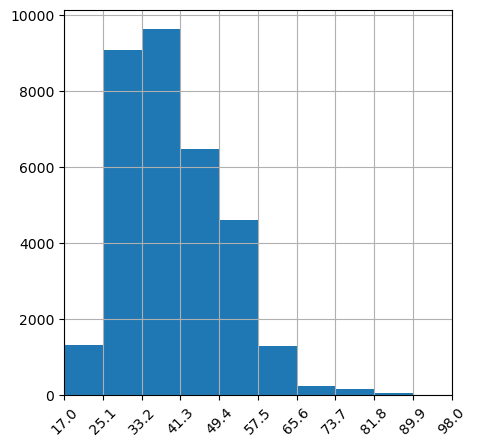

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
age,40.034,38.000,10.439,0.801,0.853,17.000,98.000,0.094,0.000


In [14]:
histo(train_df, "age", 10)
stats_descr("age")

In [15]:
#highly skewed variable, so we can add logarithm-based new variable
train_df["age_log"] = np.log(train_df["age"])
test_df["age_log"] = np.log(test_df["age"])

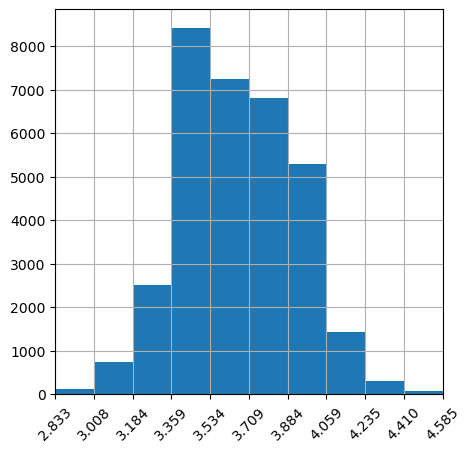

In [16]:
# histogram for new variable on train dataset
histo(train_df, "age_log", 10)

### "job"

In [17]:
category_var_summary(train_df, "job")

,0,1,Count
admin.,0.870,0.130,8318.0
blue-collar,0.933,0.067,7392.0
entrepreneur,0.914,0.086,1121.0
housemaid,0.896,0.104,855.0
management,0.886,0.114,2343.0
retired,0.745,0.255,1383.0
self-employed,0.895,0.105,1156.0
services,0.918,0.082,3207.0
student,0.691,0.309,687.0
technician,0.891,0.109,5390.0


In [18]:
# many categorical variable, so we can add new column with bins based on "y" distribution instead of one-hot encoding
jobs_to_id = dict(pd.cut(train_df.groupby("job")["y"].mean(), bins=5, labels=range(5)))
jobs_to_id

{'admin.': 1,
 'blue-collar': 0,
 'entrepreneur': 0,
 'housemaid': 0,
 'management': 0,
 'retired': 3,
 'self-employed': 0,
 'services': 0,
 'student': 4,
 'technician': 0,
 'unemployed': 1,
 'unknown': 1}

In [19]:
train_df['job_bins'] = train_df['job'].replace(jobs_to_id)
test_df['job_bins'] = test_df['job'].replace(jobs_to_id)

In [20]:
category_var_summary(train_df, "job_bins")

,0,1,Count
0,0.911,0.089,21464.0
1,0.869,0.131,9416.0
3,0.745,0.255,1383.0
4,0.691,0.309,687.0
All,0.887,0.113,32950.0


In [21]:
test_df['job_bins'].isna().sum() # no other values in test set than these in our dictionary

0

### "marital"

In [22]:
category_var_summary(train_df, "marital")

,0,1,Count
divorced,0.893,0.107,3660.0
married,0.899,0.101,19935.0
single,0.860,0.140,9289.0
unknown,0.864,0.136,66.0
All,0.887,0.113,32950.0


In [23]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["marital"], prefix = "marital"))

test_df.join(pd.get_dummies(test_df["marital"], prefix = "marital"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "education"

In [24]:
category_var_summary(train_df, "education")

,0,1,Count
basic.4y,0.895,0.105,3344.0
basic.6y,0.919,0.081,1862.0
basic.9y,0.922,0.078,4787.0
high.school,0.892,0.108,7569.0
illiterate,0.769,0.231,13.0
professional.course,0.889,0.111,4178.0
university.degree,0.862,0.138,9798.0
unknown,0.856,0.144,1399.0
All,0.887,0.113,32950.0


In [25]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["education"], prefix = "education"))

test_df.join(pd.get_dummies(test_df["education"], prefix = "education"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

In [26]:
# education is ordinal value, so we can add variable with label encoding
# unknown: i add that to "univeristy degree" category which is the biggest category and also "y" distribution is similar
edu_map = {'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4, 'professional.course': 5, 
           'high.school': 6, 'university.degree': 7, 'unknown': 7}

train_df['education_label_encoding'] = train_df['education'].map(edu_map)
test_df['education_label_encoding'] = test_df['education'].map(edu_map)

In [27]:
category_var_summary(train_df, "education_label_encoding")

,0,1,Count
1,0.769,0.231,13.0
2,0.895,0.105,3344.0
3,0.919,0.081,1862.0
4,0.922,0.078,4787.0
5,0.889,0.111,4178.0
6,0.892,0.108,7569.0
7,0.861,0.139,11197.0
All,0.887,0.113,32950.0


In [28]:
test_df['education_label_encoding'].isna().sum() # no other values in test set than these in our dictionary

0

### "default"

In [29]:
category_var_summary(train_df, "default")

,0,1,Count
no,0.871,0.129,26121.0
unknown,0.949,0.051,6827.0
yes,1.000,0.000,2.0
All,0.887,0.113,32950.0


In [30]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["default"], prefix = "default"))

test_df.join(pd.get_dummies(test_df["default"], prefix = "default"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "housing"

In [31]:
category_var_summary(train_df, "housing")

,0,1,Count
no,0.891,0.109,14927.0
unknown,0.891,0.109,773.0
yes,0.884,0.116,17250.0
All,0.887,0.113,32950.0


In [32]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["housing"], prefix = "housing"))

test_df.join(pd.get_dummies(test_df["housing"], prefix = "housing"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "loan"

In [33]:
category_var_summary(train_df, "loan")

,0,1,Count
no,0.887,0.113,27164.0
unknown,0.891,0.109,773.0
yes,0.891,0.109,5013.0
All,0.887,0.113,32950.0


In [34]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["loan"], prefix = "loan"))

test_df.join(pd.get_dummies(test_df["loan"], prefix = "loan"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "contact"

In [35]:
category_var_summary(train_df, "contact")

,0,1,Count
cellular,0.853,0.147,20913.0
telephone,0.947,0.053,12037.0
All,0.887,0.113,32950.0


In [36]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["contact"], prefix = "contact"))

test_df.join(pd.get_dummies(test_df["contact"], prefix = "contact"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "month"

In [37]:
category_var_summary(train_df, "month")

,0,1,Count
apr,0.799,0.201,2124.0
aug,0.897,0.103,4945.0
dec,0.483,0.517,143.0
jul,0.908,0.092,5664.0
jun,0.894,0.106,4224.0
mar,0.503,0.497,449.0
may,0.936,0.064,11106.0
nov,0.898,0.102,3255.0
oct,0.557,0.443,566.0
sep,0.546,0.454,474.0


In [38]:
# "month" is ordinal value, so we can add variable with label encoding
month_map = { 'apr': 4, 'aug': 8, 'dec': 12, 'jul': 7, 'jun': 6, 
            'mar': 3, 'may': 5, 'nov': 11, 'oct': 10, 'sep': 9}

train_df['month_label_encoding'] = train_df['month'].map(month_map)
test_df['month_label_encoding'] = test_df['month'].map(month_map)

In [39]:
category_var_summary(train_df, "month_label_encoding")

,0,1,Count
3,0.503,0.497,449.0
4,0.799,0.201,2124.0
5,0.936,0.064,11106.0
6,0.894,0.106,4224.0
7,0.908,0.092,5664.0
8,0.897,0.103,4945.0
9,0.546,0.454,474.0
10,0.557,0.443,566.0
11,0.898,0.102,3255.0
12,0.483,0.517,143.0


In [40]:
test_df['month_label_encoding'].isna().sum() # no other values in test set than these in our dictionary

0

In [41]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["month"], prefix = "month"))

test_df.join(pd.get_dummies(test_df["month"], prefix = "month"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "day_of_week"

In [42]:
category_var_summary(train_df, "day_of_week")

,0,1,Count
fri,0.890,0.110,6259.0
mon,0.900,0.100,6809.0
thu,0.879,0.121,6877.0
tue,0.885,0.115,6451.0
wed,0.883,0.117,6554.0
All,0.887,0.113,32950.0


In [43]:
# "day_of_week" is ordinal value, so we can add variable with label encoding
dayofweek_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

train_df['day_of_week_label_encoding'] = train_df['day_of_week'].map(dayofweek_map)
test_df['day_of_week_label_encoding'] = test_df['day_of_week'].map(dayofweek_map)

In [44]:
category_var_summary(train_df, "day_of_week_label_encoding")

,0,1,Count
1,0.900,0.100,6809.0
2,0.885,0.115,6451.0
3,0.883,0.117,6554.0
4,0.879,0.121,6877.0
5,0.890,0.110,6259.0
All,0.887,0.113,32950.0


In [45]:
test_df['day_of_week_label_encoding'].isna().sum() # no other values in test set than these in our dictionary

0

In [46]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["day_of_week"], prefix = "day_of_week"))

test_df.join(pd.get_dummies(test_df["day_of_week"], prefix = "day_of_week"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "campaign"

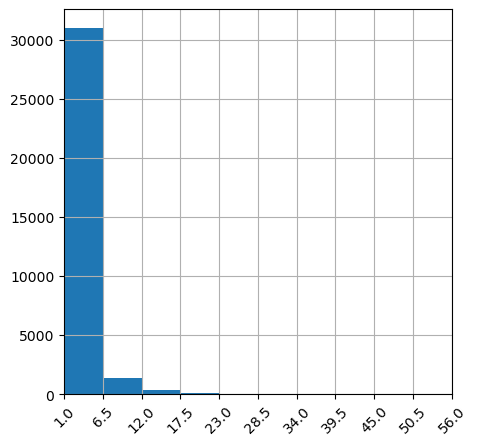

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
campaign,2.571,2.000,2.786,4.795,37.829,1.000,56.000,0.286,0.000


In [47]:
histo(train_df, "campaign", 10)
stats_descr("campaign")

In [48]:
#highly skewed variable, so we can add logarithm-based new variable
train_df["campaign_log"] = np.log(train_df["campaign"])
test_df["campaign_log"] = np.log(test_df["campaign"])

In [49]:
category_var_summary(train_df, "campaign") # we see that majority of rows has 1 in that column

,0,1,Count
1,0.870,0.130,14132.0
2,0.888,0.112,8473.0
3,0.892,0.108,4230.0
4,0.903,0.097,2105.0
5,0.920,0.080,1281.0
6,0.919,0.081,778.0
7,0.936,0.064,503.0
8,0.954,0.046,323.0
9,0.940,0.060,235.0
10,0.952,0.048,189.0


In [50]:
# we add also column with bins: 1: campaign = 1, 2: campaign = 2/3/4, 3: campaign = 5+
# bins are consistent with business logic, "y" decrease with bigger values in that column
train_df['campaign_bins'] = train_df['campaign'].apply(lambda x: 1 if x == 1 else (2 if x <= 4 else 3))
test_df['campaign_bins'] = test_df['campaign'].apply(lambda x: 1 if x == 1 else (2 if x <= 4 else 3))

### "pdays"

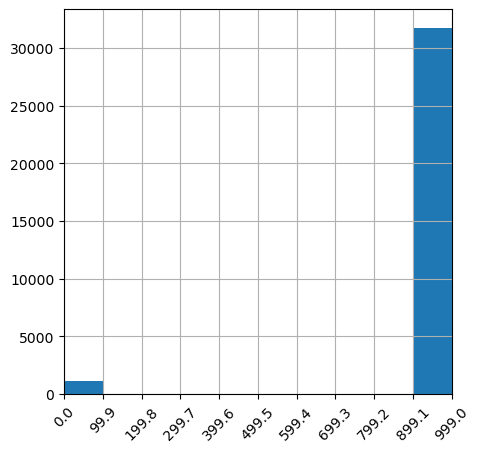

In [51]:
histo(train_df, "pdays", 10)

In [52]:
category_var_summary(train_df, "pdays")

,0,1,Count
0,0.333,0.667,9.0
1,0.650,0.350,20.0
2,0.362,0.638,47.0
3,0.319,0.681,348.0
4,0.447,0.553,85.0
5,0.359,0.641,39.0
6,0.280,0.720,318.0
7,0.373,0.627,51.0
8,0.308,0.692,13.0
9,0.471,0.529,51.0


In [53]:
# we see that great majority of rows has artificial value "999" (no previous contact) and small distribution of 1s in "y", 
# so we can add new column with two values: 0 (lack of previous contact) / 1 (previous contact)

train_df['pdays_any'] = train_df['pdays'].apply(lambda x: 0 if x == 999 else 1)
test_df['pdays_any'] = test_df['pdays'].apply(lambda x: 0 if x == 999 else 1)

In [54]:
category_var_summary(train_df, "pdays_any")

,0,1,Count
0,0.907,0.093,31765.0
1,0.354,0.646,1185.0
All,0.887,0.113,32950.0


### "previous"

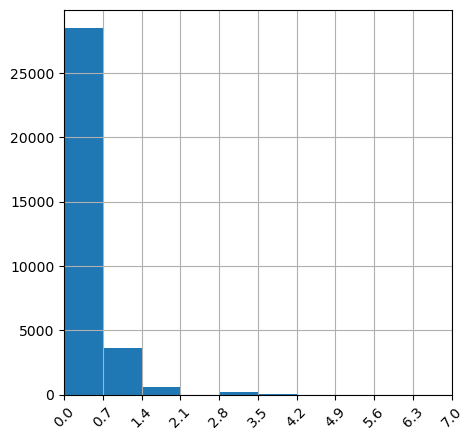

In [55]:
histo(train_df, "previous", 10)

In [56]:
category_var_summary(train_df, "previous")

,0,1,Count
0,0.912,0.088,28468.0
1,0.790,0.210,3655.0
2,0.519,0.481,576.0
3,0.393,0.607,178.0
4,0.481,0.519,54.0
5,0.231,0.769,13.0
6,0.400,0.600,5.0
7,1.000,0.000,1.0
All,0.887,0.113,32950.0


In [57]:
#highly skewed variable, so we can add logarithm-based new variable
train_df["previous_log"] = np.log(train_df["campaign"]+1)
test_df["previous_log"] = np.log(test_df["campaign"]+1)

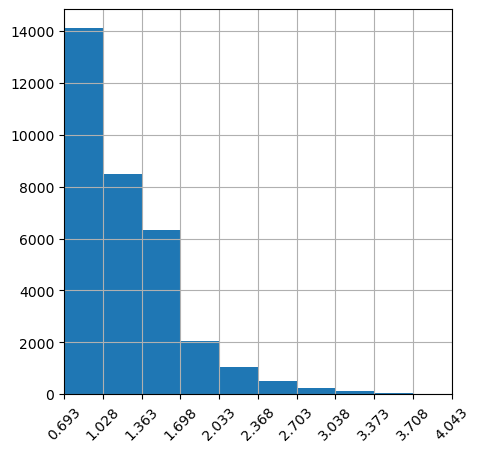

In [58]:
histo(train_df, "previous_log", 10) # still skewed variable

### "poutcome"

In [59]:
category_var_summary(train_df, "poutcome")

,0,1,Count
failure,0.858,0.142,3413.0
nonexistent,0.912,0.088,28468.0
success,0.339,0.661,1069.0
All,0.887,0.113,32950.0


In [60]:
# adding dummy variables
train_df = train_df.join(pd.get_dummies(train_df["poutcome"], prefix = "poutcome"))

test_df.join(pd.get_dummies(test_df["poutcome"], prefix = "poutcome"))
#line below to have the same dummy categories like in train dataset
test_df = test_df.reindex(columns = train_df.columns, fill_value=0)

### "emp.var.rate"

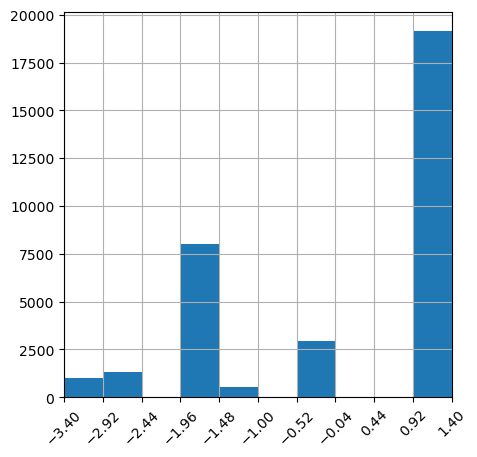

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
emp.var.rate,0.077,1.100,1.572,-0.719,-1.072,-3.400,1.400,0.324,0.000


In [61]:
histo(train_df, "emp.var.rate", 10)
stats_descr("emp.var.rate")

In [62]:
category_var_summary(train_df, "emp.var.rate")

,0,1,Count
-3.4,0.574,0.426,860.0
-3.0,0.455,0.545,134.0
-2.9,0.647,0.353,1341.0
-1.8,0.843,0.157,7407.0
-1.7,0.481,0.519,594.0
-1.1,0.509,0.491,515.0
-0.2,0.889,0.111,9.0
-0.1,0.939,0.061,2920.0
1.1,0.968,0.032,6272.0
1.4,0.946,0.054,12898.0


In [63]:
# we can try three bins: negative information (<-1), neutral information (between -1 and 1) and good information (>1)
train_df['emp.var.rate_bins'] = train_df['emp.var.rate'].apply(lambda x: 1 if x < -1 else (2 if x <= 1 else 3))
test_df['emp.var.rate_bins'] = test_df['emp.var.rate'].apply(lambda x: 1 if x < -1 else (2 if x <= 1 else 3))

In [64]:
category_var_summary(train_df, "emp.var.rate_bins")

,0,1,Count
1,0.757,0.243,10851.0
2,0.939,0.061,2929.0
3,0.953,0.047,19170.0
All,0.887,0.113,32950.0


### cons.price.idx

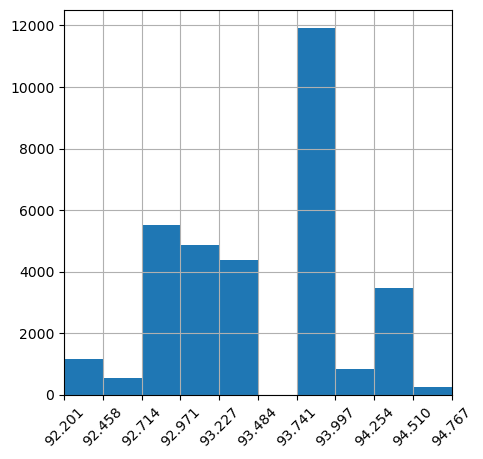

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
cons.price.idx,93.573,93.749,0.578,-0.225,-0.837,92.201,94.767,0.214,0.000


In [65]:
histo(train_df, "cons.price.idx", 10)
stats_descr("cons.price.idx")

In [66]:
category_var_summary(train_df, "cons.price.idx")

,0,1,Count
92.201,0.666,0.334,611.0
92.379,0.604,0.396,222.0
92.431,0.598,0.402,348.0
92.469,0.631,0.369,141.0
92.649,0.524,0.476,290.0
92.713,0.455,0.545,134.0
92.756,0.889,0.111,9.0
92.843,0.573,0.427,239.0
92.893,0.911,0.089,4665.0
92.963,0.632,0.368,589.0


### "cons.conf.idx"

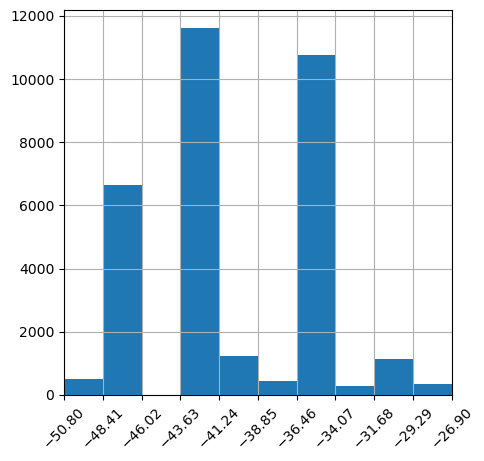

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
cons.conf.idx,-40.501,-41.800,4.637,0.292,-0.382,-50.800,-26.900,0.192,0.000


In [67]:
histo(train_df, "cons.conf.idx", 10)
stats_descr("cons.conf.idx")

In [68]:
category_var_summary(train_df, "cons.conf.idx")

,0,1,Count
-50.8,0.526,0.474,97.0
-50.0,0.573,0.427,239.0
-49.5,0.518,0.482,166.0
-47.1,0.822,0.178,1987.0
-46.2,0.911,0.089,4665.0
-45.9,0.889,0.111,9.0
-42.7,0.938,0.062,5278.0
-42.0,0.949,0.051,2868.0
-41.8,0.957,0.043,3462.0
-40.8,0.632,0.368,589.0


### "euribor3m"

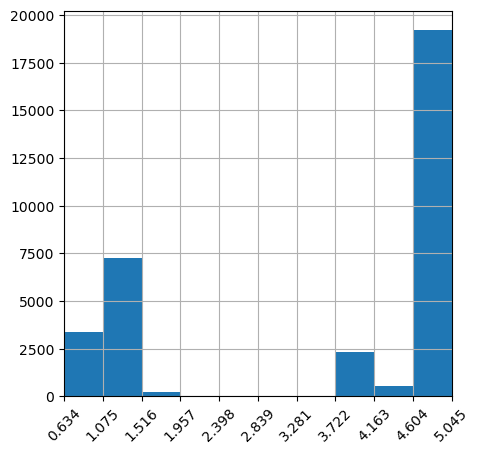

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
euribor3m,3.616,4.857,1.735,-0.702,-1.418,0.634,5.045,0.345,0.000


In [69]:
histo(train_df, "euribor3m", 10)
stats_descr("euribor3m")

### "nr.employed"

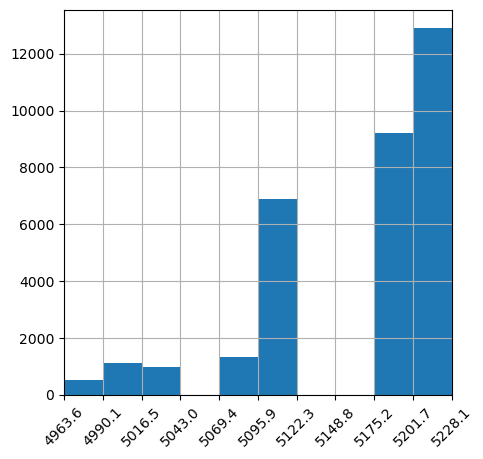

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
nr.employed,5166.839,5191.000,72.147,-1.037,-0.012,4963.600,5228.100,0.302,0.000


In [70]:
histo(train_df, "nr.employed", 10)
stats_descr("nr.employed")

In [71]:
category_var_summary(train_df, "nr.employed")

,0,1,Count
4963.6,0.509,0.491,515.0
4991.6,0.481,0.519,594.0
5008.7,0.432,0.568,516.0
5017.5,0.574,0.426,860.0
5023.5,0.455,0.545,134.0
5076.2,0.647,0.353,1341.0
5099.1,0.874,0.126,6891.0
5176.3,0.889,0.111,9.0
5191.0,0.968,0.032,6272.0
5195.8,0.939,0.061,2920.0


## Modeling

In [72]:
def gini_score(y, preds):
        return 2*roc_auc_score(y, preds)-1

In [73]:
y_train = train_df["y"]
X_train = train_df.drop(['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                        'day_of_week', 'pdays', 'poutcome'], axis=1)
y_test = test_df["y"]
X_test = test_df.drop(['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                        'day_of_week', 'pdays', 'poutcome'], axis=1)

In [74]:
# features
len(X_train.columns)

59

### Basic logistic regression (model 1)

In [75]:
pipeline = make_pipeline(MinMaxScaler(), 
                         LogisticRegression(solver='saga', max_iter=1000))

parameters = {'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__C': [i/50 for i in range(0, 51)],
              'logisticregression__fit_intercept': (True, False)}

model_1 = RandomizedSearchCV(estimator=pipeline, 
                        param_distributions=parameters,
                        scoring='roc_auc',
                        error_score='raise',
                        cv=5)
                         
model_1.fit(X_train, y_train)
model_1_y_pred_proba_train = model_1.best_estimator_.predict_proba(X_train)[:, 1]
model_1_y_pred_proba_test = model_1.best_estimator_.predict_proba(X_test)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_1_y_pred_proba_train), 3))
print("Gini - test sample:", np.round(gini_score(y_test, model_1_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_1_y_pred_proba_train) - \
                                          gini_score(y_test, model_1_y_pred_proba_test), 3))

Gini - train sample: 0.588
Gini - test sample: 0.55
Train-test difference:  0.038


In [76]:
model_1.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.98, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [77]:
# number of variables in model 1
np.sum(abs(model_1.best_estimator_.named_steps['logisticregression'].coef_) > 0)

47

In [79]:
feature_names = X_train.columns

model_1_coef = model_1.best_estimator_.named_steps['logisticregression'].coef_.flatten()
model_1_intercept = model_1.best_estimator_.named_steps['logisticregression'].intercept_

model_1_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': model_1_coef})
model_1_table = pd.concat([model_1_table, pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model_1_intercept[0]]})], ignore_index=True)

model_1_table = model_1_table.iloc[abs(model_1_table['Coefficient']).argsort()[::-1]].reset_index(drop=True)

print(np.round(model_1_table.head(48), 3))

                          Feature  Coefficient
0                    emp.var.rate       -4.851
1                  cons.price.idx        3.705
2                        campaign       -3.140
3                       euribor3m        2.179
4                             age        2.056
5                         age_log       -1.747
6                       Intercept       -1.586
7                       month_mar        1.242
8               emp.var.rate_bins       -1.236
9                       pdays_any        0.970
10                  cons.conf.idx        0.907
11                   campaign_log        0.778
12              contact_telephone       -0.644
13                      month_nov       -0.612
14                      month_may       -0.461
15               poutcome_failure       -0.459
16               poutcome_success        0.454
17                      month_dec        0.427
18                      month_jun       -0.347
19                      month_aug        0.254
20           

In [80]:
# we will add info about models to lists to prepare final dataframe with summary at the end

train_scores = []
train_scores.append(gini_score(y_train, model_1_y_pred_proba_train))

test_scores = []
test_scores.append(gini_score(y_test, model_1_y_pred_proba_test))

variables_in_model = []
variables_in_model.append(np.sum(abs(model_1.best_estimator_.named_steps['logisticregression'].coef_) > 0))

model_names = []
model_names.append("Model 1")

algos = []
algos.append("logistic regression")

descriptions = []
descriptions.append("basic logistic regression")

### Logistic regression with strong regularization (models 2 and 3)

We have a lot of variables and overfitting, so we can use L1 (Lasso) regularization to select features and decrease overfitting. We test small values for C parameter in two approaches: with MinMaxScaler and with StandardScaler

#### Model 2 (logistic regression with strong regularization and MinMaxScaler for scaling)

In [81]:
pipeline = make_pipeline(MinMaxScaler(), 
                         LogisticRegression(solver='saga', max_iter=1000))

parameters = {'logisticregression__penalty': ['l1'],
              'logisticregression__C': [i/1000 for i in range(1, 15)],
              'logisticregression__fit_intercept': (True, False)}

model_2 = RandomizedSearchCV(estimator=pipeline, 
                         param_distributions=parameters,
                         scoring='roc_auc',
                         cv=5)
                         
model_2.fit(X_train, y_train)
model_2_y_pred_proba_train = model_2.best_estimator_.predict_proba(X_train)[:, 1]
model_2_y_pred_proba_test = model_2.best_estimator_.predict_proba(X_test)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_2_y_pred_proba_train), 3))
print("Gini - test sample:", np.round(gini_score(y_test, model_2_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_2_y_pred_proba_train) - \
                                          gini_score(y_test, model_2_y_pred_proba_test), 3))

Gini - train sample: 0.573
Gini - test sample: 0.534
Train-test difference:  0.039


In [82]:
model_2.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.014, fit_intercept=False, max_iter=1000,
                                    penalty='l1', solver='saga'))])

In [83]:
# number of variables in model 2
np.sum(abs(model_2.best_estimator_.named_steps['logisticregression'].coef_) > 0)

14

In [84]:
feature_names = X_train.columns

model_2_coef = model_2.best_estimator_.named_steps['logisticregression'].coef_.flatten()
model_2_intercept = model_2.best_estimator_.named_steps['logisticregression'].intercept_

model_2_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': model_2_coef})
model_2_table = pd.concat([model_2_table, pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model_2_intercept[0]]})], ignore_index=True)

model_2_table = model_2_table.iloc[abs(model_2_table['Coefficient']).argsort()[::-1]].reset_index(drop=True)

print(np.round(model_2_table.head(14), 3))

                        Feature  Coefficient
0                   nr.employed       -2.398
1                     pdays_any        0.877
2                     month_may       -0.709
3              poutcome_success        0.328
4                  emp.var.rate       -0.293
5              poutcome_failure       -0.245
6             contact_telephone       -0.193
7                      job_bins        0.140
8               default_unknown       -0.114
9               day_of_week_mon       -0.094
10                    month_mar        0.091
11                    month_nov       -0.066
12                    euribor3m       -0.056
13  education_university.degree        0.024


In [85]:
train_scores.append(gini_score(y_train, model_2_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_2_y_pred_proba_test))
variables_in_model.append(np.sum(abs(model_2.best_estimator_.named_steps['logisticregression'].coef_) > 0))
model_names.append("Model 2")
algos.append("logistic regression")
descriptions.append("strong regularization + MinMaxScaler")

We have similar performance with only 14 variables in model 2 vs. 47 (+ intercept) variables in model 1

#### Model 3 (logistic regression with strong regularization and StandardScaler for scaling)

In [86]:
pipeline = make_pipeline(StandardScaler(), 
                         LogisticRegression(solver='saga', max_iter=1000))

parameters = {'logisticregression__penalty': ['l1'],
              'logisticregression__C': [i/10000 for i in range(1, 25)],
              'logisticregression__fit_intercept': (True, False)}

model_3 = RandomizedSearchCV(estimator=pipeline, 
                         param_distributions=parameters,
                         scoring='roc_auc',
                         cv=5)
                         
model_3.fit(X_train, y_train)
model_3_y_pred_proba_train = model_3.best_estimator_.predict_proba(X_train)[:, 1]
model_3_y_pred_proba_test = model_3.best_estimator_.predict_proba(X_test)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_3_y_pred_proba_train), 3))
print("Gini - test sample:", np.round(gini_score(y_test, model_3_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_3_y_pred_proba_train) - \
                                          gini_score(y_test, model_3_y_pred_proba_test), 3))

Gini - train sample: 0.559
Gini - test sample: 0.517
Train-test difference:  0.043


In [87]:
model_3.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0015, fit_intercept=False,
                                    max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [88]:
# number of variables in model 3
np.sum(abs(model_3.best_estimator_.named_steps['logisticregression'].coef_) > 0)

7

In [89]:
feature_names = X_train.columns

model_3_coef = model_3.best_estimator_.named_steps['logisticregression'].coef_.flatten()
model_3_intercept = model_3.best_estimator_.named_steps['logisticregression'].intercept_

model_3_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': model_3_coef})
model_3_table = pd.concat([model_3_table, pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model_3_intercept[0]]})], ignore_index=True)

model_3_table = model_3_table.iloc[abs(model_3_table['Coefficient']).argsort()[::-1]].reset_index(drop=True)

print(np.round(model_3_table.head(7), 3))

            Feature  Coefficient
0       nr.employed       -0.313
1  poutcome_success        0.196
2         pdays_any        0.177
3         month_may       -0.099
4         month_mar        0.027
5     cons.conf.idx        0.007
6          job_bins        0.001


In [ ]:
train_scores.append(gini_score(y_train, model_3_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_3_y_pred_proba_test))
variables_in_model.append(np.sum(abs(model_3.best_estimator_.named_steps['logisticregression'].coef_) > 0))
model_names.append("Model 3")
algos.append("logistic regression")
descriptions.append("strong regularization + StandardScaler")

Model 3 has only 7 variables, performance is slightly lower, but it is significantly simpler than model 1 (47 variables + intercept) and model 2 (14 variables).

### Random Forest (models 4-9)

Now I will try to beat my baseline, linear models with more complex algorithm - random forest

#### Basic random forest (model 4)

In [90]:
# now we don't need to use scalling for tree-based algorithm
pipeline = make_pipeline(RandomForestClassifier())

parameters = {'randomforestclassifier__max_features': list(range(5, 15)),
              'randomforestclassifier__max_depth': list(range(5, 8)),
              'randomforestclassifier__min_samples_leaf': list(range(6, 20)),
              'randomforestclassifier__criterion': ['gini', 'entropy']}

model_4 = RandomizedSearchCV(estimator = pipeline, 
                                    param_distributions=parameters,
                                    cv=5,
                                    scoring = 'roc_auc')
                         
model_4.fit(X_train, y_train)
model_4_y_pred_proba_train = model_4.best_estimator_.predict_proba(X_train)[:, 1]
model_4_y_pred_proba_test = model_4.best_estimator_.predict_proba(X_test)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_4_y_pred_proba_train), 3))
print("Gini - test sample:", np.round(gini_score(y_test, model_4_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_4_y_pred_proba_train) - \
                                          gini_score(y_test, model_4_y_pred_proba_test), 3))

Gini - train sample: 0.631
Gini - test sample: 0.59
Train-test difference:  0.041


In [91]:
model_4.best_estimator_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        max_features=11,
                                        min_samples_leaf=10))])

In [92]:
model_4_best_estimator = model_4.best_estimator_.named_steps['randomforestclassifier']
model_4_feature_importances = model_4_best_estimator.feature_importances_

model_4_feature_names = list(X_train.columns) 
model_4_feature_importances_df = pd.DataFrame({'Feature': model_4_feature_names, 'Importance': model_4_feature_importances})

model_4_feature_importances_df = model_4_feature_importances_df.sort_values(by='Importance', ascending=False)
np.round(model_4_feature_importances_df, 3)

,Feature,Importance
7,nr.employed,0.181
6,euribor3m,0.178
58,emp.var.rate_bins,0.110
3,emp.var.rate,0.094
57,poutcome_success,0.064
53,pdays_any,0.060
4,cons.price.idx,0.049
5,cons.conf.idx,0.048
34,month_label_encoding,0.031
41,month_may,0.016


In [93]:
model_4.best_estimator_.steps[-1][1].n_features_in_

59

In [94]:
train_scores.append(gini_score(y_train, model_4_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_4_y_pred_proba_test))
variables_in_model.append(model_4.best_estimator_.steps[-1][1].n_features_in_)
model_names.append("Model 4")
algos.append("random forest")
descriptions.append("basic random forest")

#### Random forest with feature selection: best 15 variables (model 5)

We have many too many variables with low impact on performance in model 4, so we can select only variables with feature importances over 1%

In [95]:
# number of variable with feature importances over 1%
len(list(model_4_feature_importances_df[model_4_feature_importances_df["Importance"] >= 0.01]["Feature"]))

15

In [96]:
model_4_best_variables = list(model_4_feature_importances_df[model_4_feature_importances_df["Importance"] >= 0.01]["Feature"])

In [97]:
X_train_rf_best = X_train[model_4_best_variables]
X_test_rf_best = X_test[model_4_best_variables]

pipeline = make_pipeline(RandomForestClassifier())

parameters = {'randomforestclassifier__max_features': list(range(5, 15)),
              'randomforestclassifier__max_depth': list(range(5, 8)),
              'randomforestclassifier__min_samples_leaf': list(range(6, 20)),
              'randomforestclassifier__criterion': ['gini', 'entropy']}

model_5 = RandomizedSearchCV(estimator = pipeline, 
                                         param_distributions=parameters,
                                         cv=5,
                                         scoring = 'roc_auc')
                         
model_5.fit(X_train_rf_best, y_train)
model_5_y_pred_proba_train = model_5.best_estimator_.predict_proba(X_train_rf_best)[:, 1]
model_5_y_pred_proba_test = model_5.best_estimator_.predict_proba(X_test_rf_best)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_5_y_pred_proba_train), 3))
print("Gini - train sample:", np.round(gini_score(y_test, model_5_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_5_y_pred_proba_train) - \
                                          gini_score(y_test, model_5_y_pred_proba_test), 3))

Gini - train sample: 0.635
Gini - train sample: 0.579
Train-test difference:  0.056


In [98]:
model_5_best_estimator = model_5.best_estimator_.named_steps['randomforestclassifier']
model_5_feature_importances = model_5_best_estimator.feature_importances_

model_5_feature_names = list(X_train_rf_best.columns)  
model_5_feature_importances_df = pd.DataFrame({'Feature': model_5_feature_names, 'Importance': model_5_feature_importances})

model_5_feature_importances_df = model_5_feature_importances_df.sort_values(by='Importance', ascending=False)
np.round(model_5_feature_importances_df, 3)

,Feature,Importance
0,nr.employed,0.391
1,euribor3m,0.256
3,emp.var.rate,0.050
5,pdays_any,0.042
4,poutcome_success,0.040
7,cons.conf.idx,0.039
8,month_label_encoding,0.036
2,emp.var.rate_bins,0.032
14,age_log,0.027
12,age,0.026


In [99]:
model_5.best_estimator_.steps[-1][1].n_features_in_

15

In [100]:
train_scores.append(gini_score(y_train, model_5_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_5_y_pred_proba_test))
variables_in_model.append(model_5.best_estimator_.steps[-1][1].n_features_in_)
model_names.append("Model 5")
algos.append("random forest")
descriptions.append("features from model 4 with importance over 1%")

#### Random forest with feature selection: best 12 variables (model 6)

there is still overfitting, so again I'll select variables with the biggest impact on performance

In [101]:
len(list(model_5_feature_importances_df[model_5_feature_importances_df["Importance"] >= 0.01]["Feature"]))

12

In [102]:
rf_best_variables_v2 = list(model_5_feature_importances_df[model_5_feature_importances_df["Importance"] >= 0.01]["Feature"])

In [103]:
X_train_rf_best_v2 = X_train[rf_best_variables_v2]
X_test_rf_best_v2 = X_test[rf_best_variables_v2]

pipeline = make_pipeline(RandomForestClassifier())

parameters = {'randomforestclassifier__max_features': list(range(5, 13)),
              'randomforestclassifier__max_depth': list(range(5, 8)),
              'randomforestclassifier__min_samples_leaf': list(range(6, 20)),
              'randomforestclassifier__criterion': ['gini', 'entropy']}

model_6 = RandomizedSearchCV(estimator = pipeline, 
                                         param_distributions=parameters,
                                         cv=5,
                                         error_score='raise',
                                         scoring = 'roc_auc')
                         
model_6.fit(X_train_rf_best_v2, y_train)
model_6_y_pred_proba_train = model_6.best_estimator_.predict_proba(X_train_rf_best_v2)[:, 1]
model_6_y_pred_proba_test = model_6.best_estimator_.predict_proba(X_test_rf_best_v2)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_6_y_pred_proba_train), 3))
print("Gini - train sample:", np.round(gini_score(y_test, model_6_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_6_y_pred_proba_train) - \
                                          gini_score(y_test, model_6_y_pred_proba_test), 3))

Gini - train sample: 0.625
Gini - train sample: 0.602
Train-test difference:  0.023


In [104]:
model_6_best_estimator = model_6.best_estimator_.named_steps['randomforestclassifier']
model_6_feature_importances = model_6_best_estimator.feature_importances_

model_6_feature_names = list(X_train_rf_best_v2.columns)  
model_6_feature_importances_df = pd.DataFrame({'Feature': model_6_feature_names, 'Importance': model_6_feature_importances})

model_6_feature_importances_df = model_6_feature_importances_df.sort_values(by='Importance', ascending=False)
np.round(model_6_feature_importances_df, 3)

,Feature,Importance
0,nr.employed,0.535
1,euribor3m,0.175
4,poutcome_success,0.045
5,cons.conf.idx,0.044
6,month_label_encoding,0.043
3,pdays_any,0.033
9,age,0.032
8,age_log,0.031
2,emp.var.rate,0.026
10,cons.price.idx,0.024


In [105]:
model_6.best_estimator_.steps[-1][1].n_features_in_

12

In [106]:
train_scores.append(gini_score(y_train, model_6_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_6_y_pred_proba_test))
variables_in_model.append(model_6.best_estimator_.steps[-1][1].n_features_in_)
model_names.append("Model 6")
algos.append("random forest")
descriptions.append("features from model 5 with importance over 1%")

#### Random forest with feature selection: best 10 variables (model 7)

again I try to limit number of variables 

In [107]:
len(list(model_6_feature_importances_df[model_6_feature_importances_df["Importance"] >= 0.02]["Feature"]))

10

In [109]:
rf_best_variables_v3 = list(model_6_feature_importances_df[model_6_feature_importances_df["Importance"] >= 0.02]["Feature"])
X_train_rf_best_v3 = X_train[rf_best_variables_v3]
X_test_rf_best_v3 = X_test[rf_best_variables_v3]

pipeline = make_pipeline(RandomForestClassifier())

parameters = {'randomforestclassifier__max_features': list(range(5, 10)),
              'randomforestclassifier__max_depth': list(range(5, 8)),
              'randomforestclassifier__min_samples_leaf': list(range(6, 20)),
              'randomforestclassifier__criterion': ['gini', 'entropy']}

model_7 = RandomizedSearchCV(estimator = pipeline, 
                                         param_distributions=parameters,
                                         cv=5,
                                         error_score='raise',
                                         scoring = 'roc_auc')
                         
model_7.fit(X_train_rf_best_v3, y_train)
model_7_y_pred_proba_train = model_7.best_estimator_.predict_proba(X_train_rf_best_v3)[:, 1]
model_7_y_pred_proba_test = model_7.best_estimator_.predict_proba(X_test_rf_best_v3)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_7_y_pred_proba_train), 3))
print("Gini - train sample:", np.round(gini_score(y_test, model_7_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_7_y_pred_proba_train) - \
                                          gini_score(y_test, model_7_y_pred_proba_test), 3))

Gini - train sample: 0.626
Gini - train sample: 0.605
Train-test difference:  0.021


In [110]:
model_7_best_estimator = model_7.best_estimator_.named_steps['randomforestclassifier']
model_7_feature_importances = model_7_best_estimator.feature_importances_

model_7_feature_names = list(X_train_rf_best_v3.columns)  
model_7_feature_importances_df = pd.DataFrame({'Feature': model_7_feature_names, 'Importance': model_7_feature_importances})

model_7_feature_importances_df = model_7_feature_importances_df.sort_values(by='Importance', ascending=False)
np.round(model_7_feature_importances_df, 3)

,Feature,Importance
0,nr.employed,0.460
1,euribor3m,0.250
4,month_label_encoding,0.052
2,poutcome_success,0.048
3,cons.conf.idx,0.041
8,emp.var.rate,0.039
5,pdays_any,0.030
6,age,0.030
7,age_log,0.030
9,cons.price.idx,0.021


In [111]:
model_7.best_estimator_.steps[-1][1].n_features_in_

10

In [112]:
train_scores.append(gini_score(y_train, model_7_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_7_y_pred_proba_test))
variables_in_model.append(model_7.best_estimator_.steps[-1][1].n_features_in_)
model_names.append("Model 7")
algos.append("random forest")
descriptions.append("features from model 6 with importance over 2%")

#### Random forest with feature selection: best 5 variables (model 8)

In [113]:
rf_best_variables_v4 = list(model_7_feature_importances_df[model_7_feature_importances_df["Importance"] >= 0.04]["Feature"])
X_train_rf_best_v4 = X_train[rf_best_variables_v4]
X_test_rf_best_v4 = X_test[rf_best_variables_v4]

pipeline = make_pipeline(RandomForestClassifier())

parameters = {'randomforestclassifier__max_features': list(range(4, 6)),
              'randomforestclassifier__max_depth': list(range(5, 8)),
              'randomforestclassifier__min_samples_leaf': list(range(6, 20)),
              'randomforestclassifier__criterion': ['gini', 'entropy']}

model_8 = RandomizedSearchCV(estimator = pipeline, 
                                         param_distributions=parameters,
                                         cv=5,
                                         error_score='raise',
                                         scoring = 'roc_auc')
                         
model_8.fit(X_train_rf_best_v4, y_train)
model_8_y_pred_proba_train = model_8.best_estimator_.predict_proba(X_train_rf_best_v4)[:, 1]
model_8_y_pred_proba_test = model_8.best_estimator_.predict_proba(X_test_rf_best_v4)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_8_y_pred_proba_train), 3))
print("Gini - train sample:", np.round(gini_score(y_test, model_8_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_8_y_pred_proba_train) - \
                                          gini_score(y_test, model_8_y_pred_proba_test), 3))

Gini - train sample: 0.609
Gini - train sample: 0.596
Train-test difference:  0.013


In [114]:
model_8_best_estimator = model_8.best_estimator_.named_steps['randomforestclassifier']
model_8_feature_importances = model_8_best_estimator.feature_importances_

model_8_feature_names = list(X_train_rf_best_v4.columns)  
model_8_feature_importances_df = pd.DataFrame({'Feature': model_8_feature_names, 'Importance': model_8_feature_importances})

model_8_feature_importances_df = model_8_feature_importances_df.sort_values(by='Importance', ascending=False)
np.round(model_8_feature_importances_df, 3)

,Feature,Importance
0,nr.employed,0.656
1,euribor3m,0.135
3,poutcome_success,0.082
2,month_label_encoding,0.063
4,cons.conf.idx,0.063


In [115]:
model_8.best_estimator_.steps[-1][1].n_features_in_

5

In [116]:
train_scores.append(gini_score(y_train, model_8_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_8_y_pred_proba_test))
variables_in_model.append(model_8.best_estimator_.steps[-1][1].n_features_in_)
model_names.append("Model 8")
algos.append("random forest")
descriptions.append("features from model 7 with importance over 4%")

### XGBoost

#### XGBoost with gamma regularization (model 9)

In [117]:
pipeline = make_pipeline(xgb.XGBClassifier())

parameters = {'xgbclassifier__n_estimators' : [5000],
              'xgbclassifier__gamma': [4]}

model_9 = RandomizedSearchCV(estimator=pipeline,
                                param_distributions=parameters,
                                scoring='roc_auc',
                                cv=5,
                                n_jobs=-1)
                         
model_9.fit(X_train_rf_best_v3, y_train)
model_9_y_pred_proba_train = model_9.best_estimator_.predict_proba(X_train_rf_best_v3)[:, 1]
model_9_y_pred_proba_test = model_9.best_estimator_.predict_proba(X_test_rf_best_v3)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_9_y_pred_proba_train), 3))
print("Gini - test sample:", np.round(gini_score(y_test, model_9_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_9_y_pred_proba_train) - \
                                          gini_score(y_test, model_9_y_pred_proba_test), 3))

C:\Users\marci\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Gini - train sample: 0.619
Gini - test sample: 0.608
Train-test difference:  0.011


In [119]:
model_9_best_estimator = model_9.best_estimator_
model_9_importances = model_9_best_estimator.named_steps['xgbclassifier'].feature_importances_
model_9_feature_names = X_train_rf_best_v3.columns

model_9_importance_df = pd.DataFrame({'Feature': model_9_feature_names, 'Importance': model_9_importances})
model_9_importance_df = model_9_importance_df.sort_values('Importance', ascending=False)

print(model_9_importance_df)

                Feature  Importance
0           nr.employed    0.599576
2      poutcome_success    0.133495
3         cons.conf.idx    0.131056
5             pdays_any    0.049851
1             euribor3m    0.029688
9        cons.price.idx    0.023415
4  month_label_encoding    0.017034
6                   age    0.015886
7               age_log    0.000000
8          emp.var.rate    0.000000


In [121]:
model_9.best_estimator_.steps[-1][1].n_features_in_

10

In [122]:
train_scores.append(gini_score(y_train, model_9_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_9_y_pred_proba_test))
variables_in_model.append(model_9.best_estimator_.steps[-1][1].n_features_in_)
model_names.append("Model 9")
algos.append("XGBoost")
descriptions.append("features from model 7 with gamma regularization")

#### XGBoost with gamma regularization, lower depth and limited features (model 10)

In [124]:
xgb_variables = list(model_9_importance_df[model_9_importance_df["Importance"] >= 0.01]["Feature"])
X_train_xgb = X_train[xgb_variables]
X_test_xgb = X_test[xgb_variables]

In [125]:
pipeline = make_pipeline(xgb.XGBClassifier())

parameters = {'xgbclassifier__n_estimators' : [1000],
              'xgbclassifier__gamma': [10],
              'xgbclassifier__subsample': [0.5],
              'xgbclassifier__max_depth': [5]}

model_10 = RandomizedSearchCV(estimator=pipeline,
                                param_distributions=parameters,
                                scoring='roc_auc',
                                cv=5,
                                n_jobs=-1)
                         
model_10.fit(X_train_xgb, y_train)
model_10_y_pred_proba_train = model_10.best_estimator_.predict_proba(X_train_xgb)[:, 1]
model_10_y_pred_proba_test = model_10.best_estimator_.predict_proba(X_test_xgb)[:, 1]
print("Gini - train sample:", np.round(gini_score(y_train, model_10_y_pred_proba_train), 3))
print("Gini - test sample:", np.round(gini_score(y_test, model_10_y_pred_proba_test), 3))
print("Train-test difference: ", np.round(gini_score(y_train, model_10_y_pred_proba_train) - \
                                          gini_score(y_test, model_10_y_pred_proba_test), 3))

C:\Users\marci\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Gini - train sample: 0.622
Gini - test sample: 0.605
Train-test difference:  0.017


In [127]:
model_10_best_estimator = model_10.best_estimator_
model_10_importances = model_10_best_estimator.named_steps['xgbclassifier'].feature_importances_
model_10_feature_names = X_train_xgb.columns

model_10_importance_df = pd.DataFrame({'Feature': model_10_feature_names, 'Importance': model_10_importances})
model_10_importance_df = model_10_importance_df.sort_values('Importance', ascending=False)

print(model_10_importance_df)

                Feature  Importance
0           nr.employed    0.559371
3             pdays_any    0.139999
1      poutcome_success    0.092174
2         cons.conf.idx    0.069993
4             euribor3m    0.042229
5        cons.price.idx    0.036986
7                   age    0.030589
6  month_label_encoding    0.028660


In [128]:
train_scores.append(gini_score(y_train, model_10_y_pred_proba_train))
test_scores.append(gini_score(y_test, model_10_y_pred_proba_test))
variables_in_model.append(model_10.best_estimator_.steps[-1][1].n_features_in_)
model_names.append("Model 10")
algos.append("XGBoost")
descriptions.append("features from model 9 with importance over 1%")

## Summary

In [129]:
summary_df = pd.DataFrame({'Model': model_names,
                            'Method': algos,
                            'Description': descriptions,
                           'Variables': variables_in_model,
                            'Train_score': train_scores,
                            'Test_score': test_scores})

summary_df["Train_test_difference"] = summary_df["Train_score"] - summary_df["Test_score"]
np.round(summary_df, 3)

,Model,Method,Description,Variables,Train_score,Test_score,Train_test_difference
0,Model 1,logistic regression,basic logistic regression,47,0.588,0.550,0.038
1,Model 2,logistic regression,strong regularization + MinMaxScaler,14,0.573,0.534,0.039
2,Model 4,random forest,basic random forest,59,0.631,0.590,0.041
3,Model 5,random forest,features from model 4 with importance over 1%,15,0.635,0.579,0.056
4,Model 6,random forest,features from model 5 with importance over 1%,12,0.625,0.602,0.023
5,Model 7,random forest,features from model 6 with importance over 2%,10,0.626,0.605,0.021
6,Model 8,random forest,features from model 7 with importance over 4%,5,0.609,0.596,0.013
7,Model 9,XGBoost,features from model 7 with gamma regularization,10,0.619,0.608,0.011
8,Model 10,XGBoost,features from model 9 with importance over 1%,8,0.622,0.605,0.017


my final model is model 9: it has the biggest Gini score on test dataset and the lowest overfitting

## Business conclusions

in my final model I have three the most important features for success in marketing campaign:
* nr.employed: number of employees
* poutcome_success: outcome of the previous marketing campaign with status 'success'
* cons.conf.idx: consumer confidence index